<a href="https://colab.research.google.com/github/Egade/evidences-of-activities-Rubenanr/blob/main/Activity_5_Data_interpretations_using_Histograms_%26_Boxplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "/content/drive/MyDrive/datasets/antropometria-dataset-1 (1).csv"

In [ ]:
df = pd.read_csv(path)
df.head()

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.0,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.5,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.0,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215


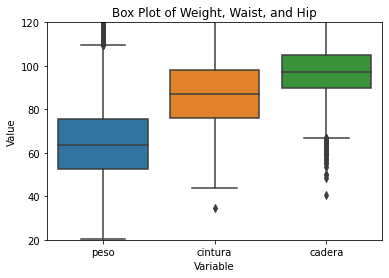

In [ ]:
sns.boxplot(x='variable', y='value', data=pd.melt(df[['peso', 'cintura', 'cadera']]))
plt.title('Box Plot of Weight, Waist, and Hip')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.ylim([20, 120])
plt.show()

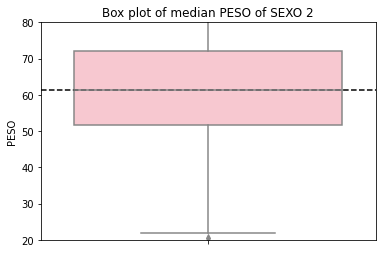

In [ ]:

df_female = df[df['sexo'] == 2]

median_peso = df_female['peso'].median()

sns.boxplot(y='peso', data=df_female, color='pink')

plt.axhline(median_peso, color='black', linestyle='dashed')

plt.title('Box plot of median PESO of SEXO 2')
plt.ylabel('PESO')
plt.ylim([20, 80])

plt.show()

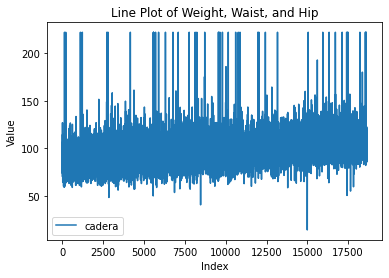

In [ ]:
sns.lineplot(data=df[['cadera']])
plt.title('Line Plot of Weight, Waist, and Hip')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

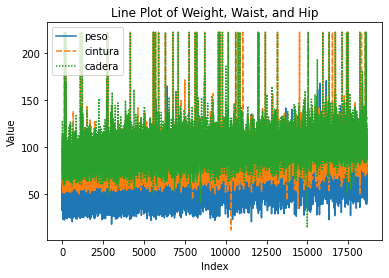

In [ ]:
sns.lineplot(data=df[['peso', 'cintura', 'cadera']])
plt.title('Line Plot of Weight, Waist, and Hip')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

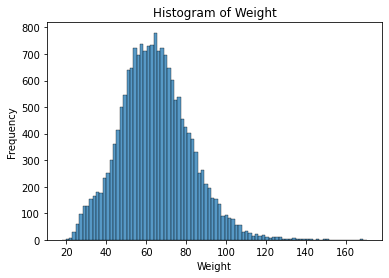

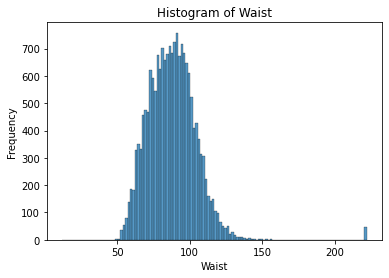

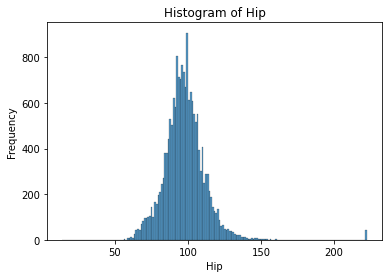

In [ ]:
sns.histplot(data=df, x='peso')
plt.title('Histogram of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=df, x='cintura')
plt.title('Histogram of Waist')
plt.xlabel('Waist')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=df, x='cadera')
plt.title('Histogram of Hip')
plt.xlabel('Hip')
plt.ylabel('Frequency')
plt.show()

In [ ]:
table = pd.pivot_table(df, values=['peso', 'cintura', 'cadera'], index='sexo', aggfunc={'peso': [min, max, 'mean', 'median'], 'cintura': [min, max, 'mean', 'median'], 'cadera': [min, max, 'mean', 'median']})
print(table)

      cadera                          cintura                            peso  \
         max       mean  median   min     max       mean median    min    max   
sexo                                                                            
1     222.22  95.064745  95.375  40.5  222.22  87.502601  87.35  11.90  170.6   
2     222.22  99.936542  99.000  14.1  222.22  88.006300  87.20  34.55  168.6   

                               
           mean median    min  
sexo                           
1     67.131228  66.75  20.55  
2     62.700503  61.45  18.00  


<Axes: >

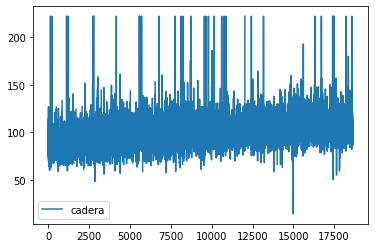

In [ ]:
df_sexo2 = df[df['sexo'] == 2]

df_sexo2.plot(kind='line', y='cadera')


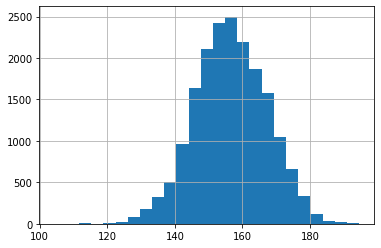

In [ ]:
df['talla'].hist(bins=25)

plt.show()

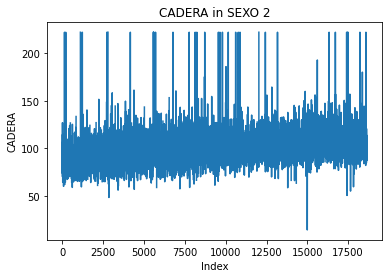

In [ ]:
df_female = df[df['sexo'] == 2]

plt.plot(df_female['cadera'])

plt.title('CADERA in SEXO 2')
plt.xlabel('Index')
plt.ylabel('CADERA')

plt.show()

In [ ]:
median_peso_by_sex = df.groupby('sexo')['peso'].median()

print("Median PESO for SEXO 1:", median_peso_by_sex[1])
print("Median PESO for SEXO 2:", median_peso_by_sex[2])

Median PESO for SEXO 1: 66.75
Median PESO for SEXO 2: 61.45


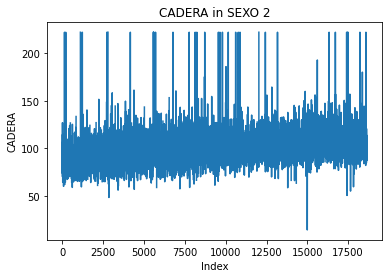

In [ ]:
df_female = df[df['sexo'] == 2]

plt.plot(df_female['cadera'])

plt.title('CADERA in SEXO 2')
plt.xlabel('Index')
plt.ylabel('CADERA')

plt.show()

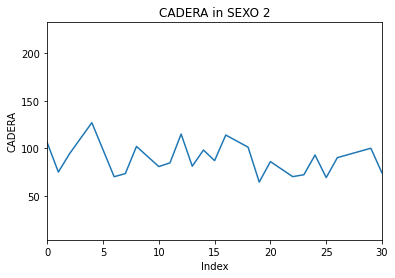

In [ ]:
df_female = df[df['sexo'] == 2]

plt.plot(df_female['cadera'])

plt.title('CADERA in SEXO 2')
plt.xlabel('Index')
plt.ylabel('CADERA')

plt.xlim(0, 30)

plt.show()

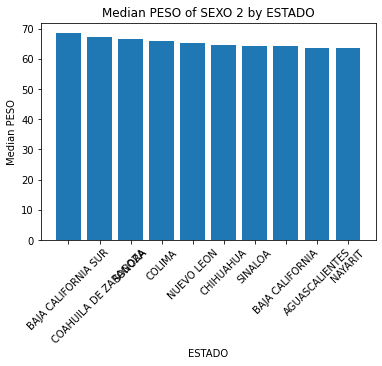

In [ ]:
df_female = df[df['sexo'] == 2]

median_peso_by_estado = df_female.groupby('desc_ent')['peso'].median()

top_10_peso = median_peso_by_estado.sort_values(ascending=False)[:10]

plt.bar(top_10_peso.index, top_10_peso)

plt.title('Median PESO of SEXO 2 by ESTADO')
plt.xlabel('ESTADO')
plt.ylabel('Median PESO')

plt.xticks(rotation=45)

plt.show()

In [ ]:
median_peso_by_estado = df.groupby(['desc_ent', 'sexo'])['peso'].median().unstack()

print(median_peso_by_estado)

sexo                                   1        2
desc_ent                                         
AGUASCALIENTES                   69.9500  63.7000
BAJA CALIFORNIA                  70.6500  64.2000
BAJA CALIFORNIA SUR              76.6500  68.5500
CAMPECHE                         67.3500  62.3750
CHIAPAS                          59.2000  56.0250
CHIHUAHUA                        69.3000  64.6250
COAHUILA DE ZARAGOZA             68.3000  67.3000
COLIMA                           71.7000  66.0000
DISTRITO FEDERAL                 69.0000  61.4500
DURANGO                          70.3500  62.5000
GUANAJUATO                       65.0625  60.3250
GUERRERO                         60.5000  57.2000
HIDALGO                          63.3000  57.9000
JALISCO                          65.5875  63.3500
MEXICO                           62.4500  56.9500
MICHOACAN DE OCAMPO              67.6250  63.4000
MORELOS                          65.2000  61.4500
NAYARIT                          69.0500  63.7000


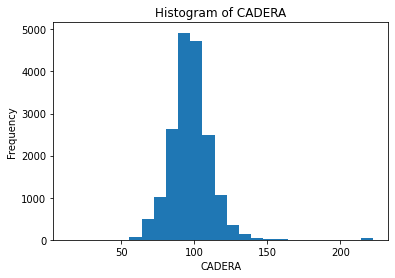

In [ ]:
plt.hist(df['cadera'], bins=25)

plt.title('Histogram of CADERA')
plt.xlabel('CADERA')
plt.ylabel('Frequency')

plt.show()